In [11]:
import train_logger as train_logger
import matplotlib.pyplot as plt

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
logger = train_logger.TrainingLogger("../baseline_model.db")
logger = train_logger.TrainingLogger("../gan_sampler.db")


Connecting to existing database at ../baseline_model.db
Connecting to existing database at ../gan_sampler.db


In [13]:
for id in logger.get_experiment_ids():
    print(id, logger.get_experiment_name(id))

1 Gen
2 Our
3 Real
4 Gen+Real
5 Our+Gen
6 Our+Real
7 Realx2


In [29]:
for exp in logger.get_experiment_ids():
    results = logger.get_results(exp)
    print(f"Experiment {exp}: {logger.get_experiment_name(exp)}")
    print(f"run_id | epoch| train_loss| train_acc| test_loss| test_acc")
    for run_id, epoch, train_loss, train_acc, test_loss, test_acc in results:
        print(f"{run_id:7d}| {epoch:5d}| {train_loss:10.2f}| {train_acc:9.2f}| {test_loss:9.2f}| {test_acc:8.2f}")

Experiment 1: Gen
run_id | epoch| train_loss| train_acc| test_loss| test_acc
      1|     0|       1.42|      0.48|      1.19|     0.58
      1|     1|       0.95|      0.66|      1.27|     0.60
      2|     0|       1.34|      0.51|      1.37|     0.54
Experiment 2: Our
run_id | epoch| train_loss| train_acc| test_loss| test_acc
      1|     0|       1.42|      0.48|      1.28|     0.56
      1|     1|       0.95|      0.66|      1.12|     0.63
      2|     0|       1.33|      0.51|      1.35|     0.54
Experiment 3: Real
run_id | epoch| train_loss| train_acc| test_loss| test_acc
      1|     0|       1.47|      0.46|      1.10|     0.60
      1|     1|       1.04|      0.63|      0.89|     0.68
      2|     0|       1.39|      0.49|      1.12|     0.59
Experiment 4: Gen+Real
run_id | epoch| train_loss| train_acc| test_loss| test_acc
      1|     0|       1.23|      0.56|      0.87|     0.69
      1|     1|       0.75|      0.74|      0.79|     0.73
      2|     0|       1.15|      0.58

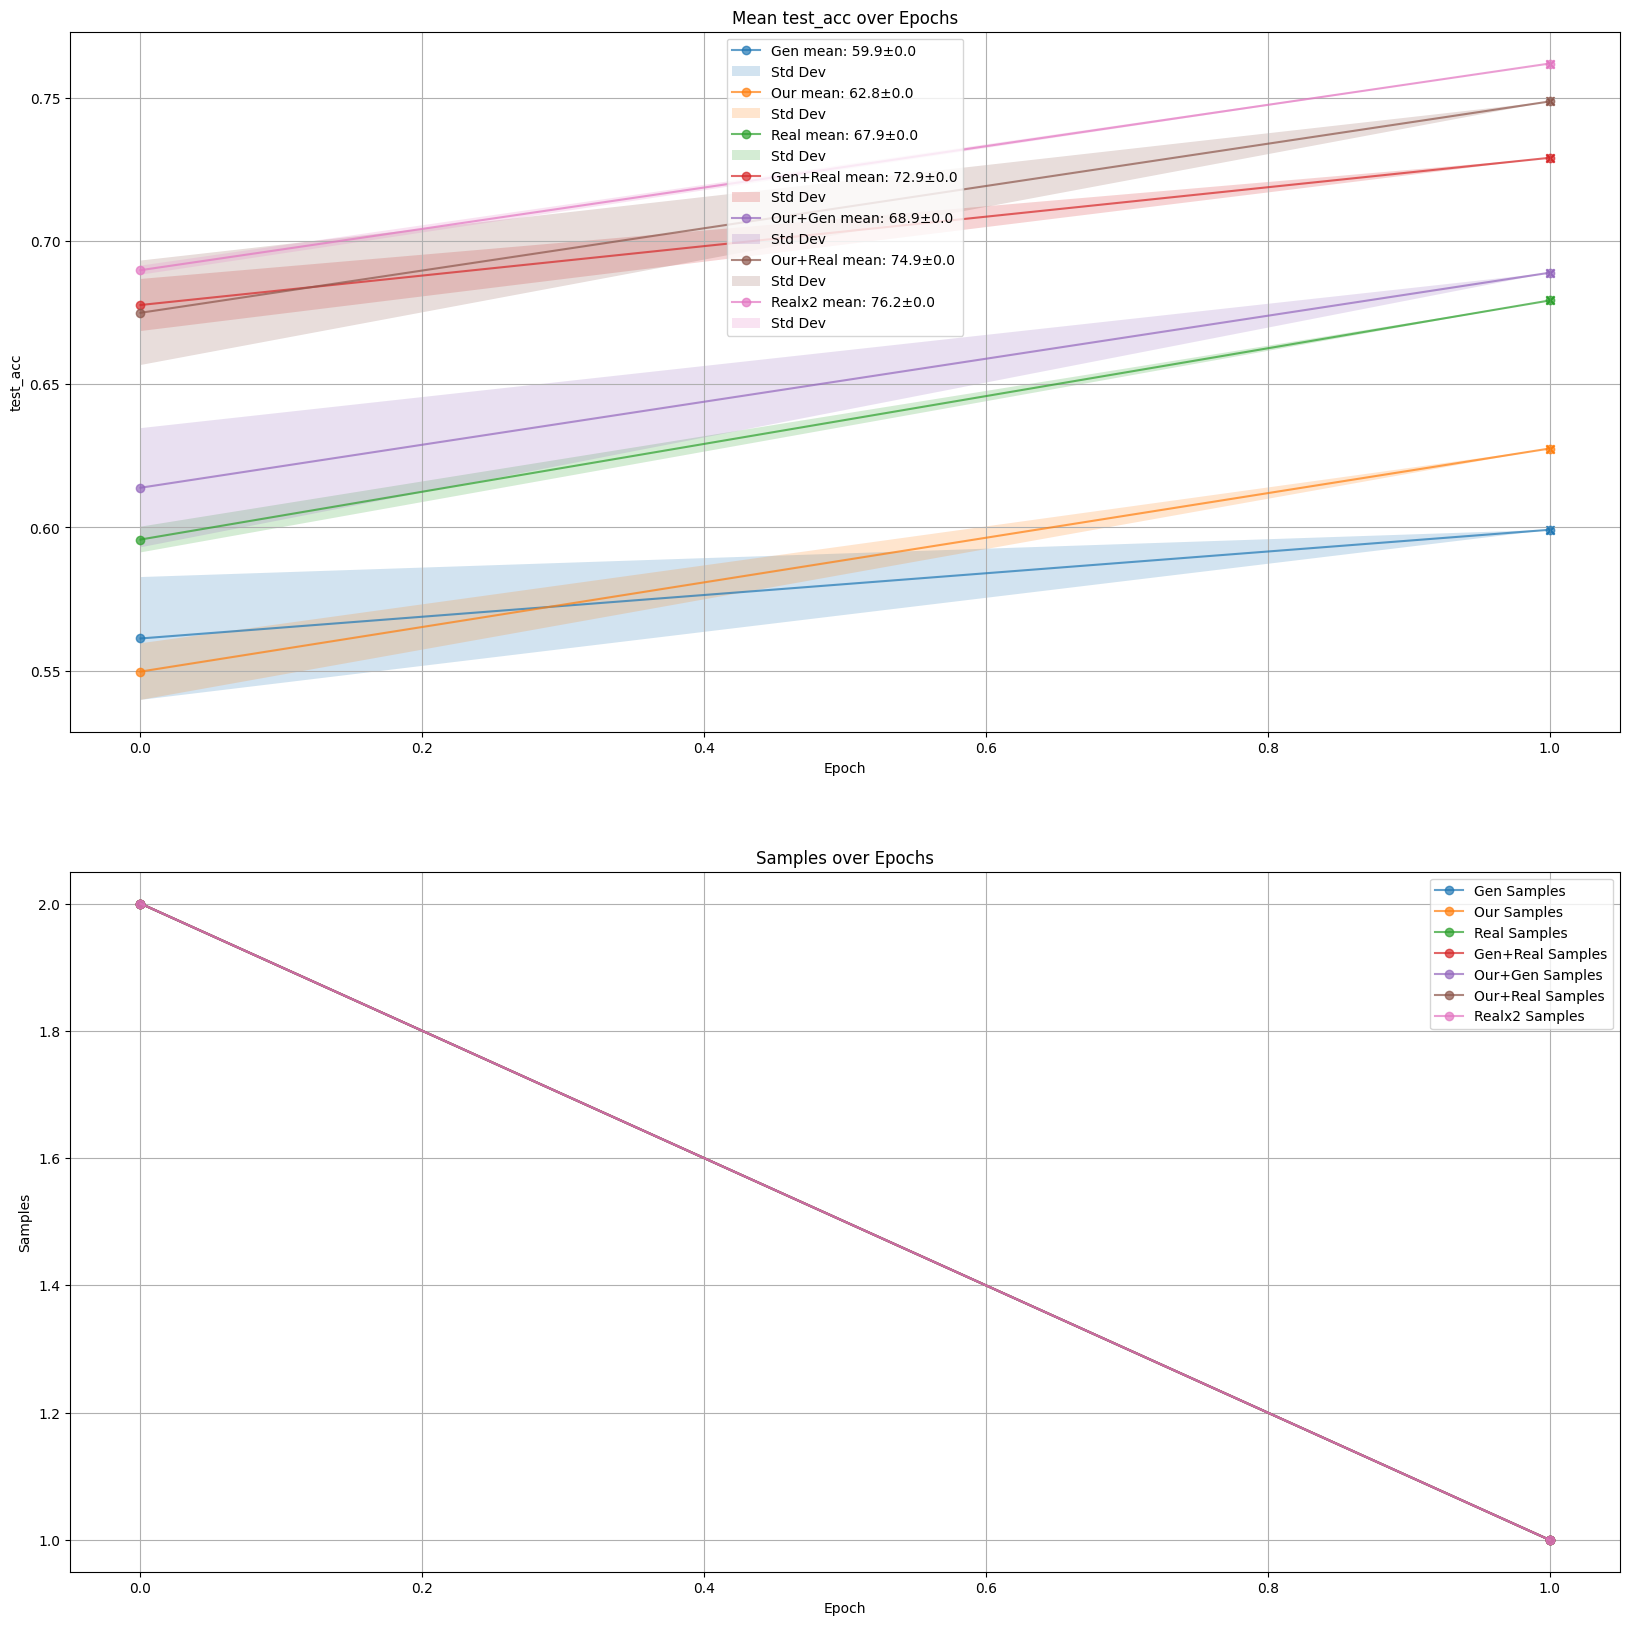

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
train_logger.plot_metric(logger, *logger.get_experiment_ids(), metric='test_acc', ax=ax[0])
train_logger.plot_samples(logger, *logger.get_experiment_ids(), metric='test_acc', ax=ax[1])